## import libraries

In [1]:
import torch
import gym
import matplotlib.pyplot as plt

##### Define cartpole environment

In [2]:
env = gym.make('CartPole-v0')

##### obtain dimensions of the observation and action space

In [3]:
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

##### run each episode with specific weight

In [4]:
def run_episode(env, weight):
  state = env.reset()
  grads = []
  total_reward = 0
  is_done = False
  while not is_done:
    state = torch.from_numpy(state).float()
    z = torch.matmul(state, weight)
    probs = torch.nn.Softmax()(z)
    action = int(torch.bernoulli(probs[1]).item())
    d_softmax = torch.diag(probs) - probs.view(-1, 1) * probs
    d_log = d_softmax[action] / probs[action]
    grad = state.view(-1, 1) * d_log
    grads.append(grad)
    state, reward, is_done, _ = env.step(action)
    total_reward += reward
    if is_done:
      break
  return total_reward, grads

In [5]:
n_episode = 1000
weight = torch.rand(n_state, n_action)
total_rewards = []
learning_rate = 0.001

In [6]:
for episode in range(n_episode):
  total_reward, gradients = run_episode(env, weight)
  print('Episode {}: {}'.format(episode + 1, total_reward))
  for i, gradient in enumerate(gradients):
    weight += learning_rate * gradient * (total_reward - i)
  total_rewards.append(total_reward)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  if __name__ == '__main__':


Episode 1: 17.0
Episode 2: 11.0
Episode 3: 51.0
Episode 4: 28.0
Episode 5: 29.0
Episode 6: 40.0
Episode 7: 9.0
Episode 8: 15.0
Episode 9: 12.0
Episode 10: 24.0
Episode 11: 20.0
Episode 12: 47.0
Episode 13: 37.0
Episode 14: 24.0
Episode 15: 43.0
Episode 16: 13.0
Episode 17: 9.0
Episode 18: 14.0
Episode 19: 32.0
Episode 20: 19.0
Episode 21: 21.0
Episode 22: 31.0
Episode 23: 18.0
Episode 24: 28.0
Episode 25: 25.0
Episode 26: 64.0
Episode 27: 27.0
Episode 28: 24.0
Episode 29: 31.0
Episode 30: 29.0
Episode 31: 18.0
Episode 32: 22.0
Episode 33: 19.0
Episode 34: 66.0
Episode 35: 52.0
Episode 36: 63.0
Episode 37: 37.0
Episode 38: 56.0
Episode 39: 34.0
Episode 40: 26.0
Episode 41: 31.0
Episode 42: 65.0
Episode 43: 17.0
Episode 44: 62.0
Episode 45: 76.0
Episode 46: 56.0
Episode 47: 61.0
Episode 48: 62.0
Episode 49: 64.0
Episode 50: 43.0
Episode 51: 72.0
Episode 52: 64.0
Episode 53: 50.0
Episode 54: 42.0
Episode 55: 27.0
Episode 56: 88.0
Episode 57: 31.0
Episode 58: 35.0
Episode 59: 43.0
Episode 

In [7]:
print('Average total reward over {} episode: {}'.format(n_episode, sum(total_rewards) / n_episode))

Average total reward over 1000 episode: 177.503


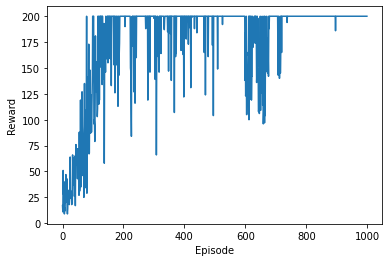

In [8]:
plt.plot(total_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()